In [ ]:
##### PREPARING THE DATASET #####

import pandas as pd 

##### Importing the load dataset ####
from google.colab import files
uploaded = files.upload()


Saving dcots_data_3_14.csv to dcots_data_3_14.csv


In [ ]:
##### IMPORTING MODULES FOR TRAINING THE DATASET ######

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.losses import binary_crossentropy, sparse_categorical_crossentropy
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


In [ ]:
import io
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the data
df = pd.read_csv(io.BytesIO(uploaded['dcots_data_3_14.csv']))

# Filter for SwitchNum == 1 and drop columns with all 0 entries
df1 = df.loc[df['SwitchNum'] == 1]
df2 = df1.loc[:, (df1 != 0).any(axis=0)]

# Split the data into input and output variables
X = df2.loc[:, 'Pd1':'Pd118']
y = df2.loc[:, 'z1':'z186']

# Convert output to a NumPy array
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weight = {}
for i in range(y_train.shape[1]):
    class_weight[i] = len(y_train) / (np.sum(y_train[:, i] == 1) * y_train.shape[1])


# Define the model


model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model with class weights
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32, class_weight=class_weight)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/300
125/125 [==============================] - 2s 3ms/step - loss: 104355.7266 - accuracy: 0.0000e+00
Epoch 2/300
125/125 [==============================] - 0s 3ms/step - loss: 6364635.0000 - accuracy: 0.0000e+00
Epoch 3/300
125/125 [==============================] - 0s 3ms/step - loss: 55019512.0000 - accuracy: 0.0000e+00
Epoch 4/300
125/125 [==============================] - 0s 3ms/step - loss: 216591344.0000 - accuracy: 0.0000e+00
Epoch 5/300
125/125 [==============================] - 0s 3ms/step - loss: 573538432.0000 - accuracy: 0.0000e+00
Epoch 6/300
125/125 [==============================] - 0s 3ms/step - loss: 1196176512.0000 - accuracy: 0.0000e+00
Epoch 7/300
125/125 [==============================] - 0s 3ms/step - loss: 2169977088.0000 - accuracy: 0.0000e+00
Epoch 8/300
125/125 [==============================] - 0s 3ms/step - loss: 3547754240.0000 - accuracy: 0.0000e+00
Epoch 9/300
125/125 [==============================] - 0s 3ms/step - loss: 5374813696.0000 - accura

In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['dcots_data_3_14.csv']))

#print('Obtaining all the entries with SwitchNum of 1: \n')
df1 = df.loc[df['SwitchNum'] == 1]
#print(df1, '\n')
#print('Dropping columns with all 0 entries: \n')
df2 = df1.loc[:, (df1 != 0).any(axis=0)] ## dropping all zero entries
#print(df2, '\n')

##### Setting input and output #####
input = df2.loc[:,'Pd1':'Pd118']
output = df2.loc[:,'z1':'z186']
train_input = input.drop(input.index[4000:5000])
train_output = output.drop(output.index[4000:5000])

# print('Input data: \n')
# print(train_input)
# print('Output data: \n')
# print(train_output)

# Count the number of samples in each class
unique, counts = np.unique(train_output.values, return_counts=True)
class_labels = [str(i) for i in unique]
print(counts)
# Find the minority class label
minority_class_label = unique[np.argmin(counts)]
print(minority_class_label)

# Get the indices of the samples in the minority class
minority_indices = np.where(train_output == minority_class_label)[0]

# Oversample the minority class
n_samples = np.max(counts) - counts[np.argmin(counts)]
print(np.max(counts))
print(n_samples)
oversampled_minority_indices = np.random.choice(minority_indices, size=n_samples, replace=True)

# Add the oversampled minority class samples to the resampled data
minority_samples = train_output.iloc[minority_indices, :]
oversampled_minority_samples = train_output.iloc[oversampled_minority_indices, :]
print(oversampled_minority_samples)
train_output_resampled = pd.concat([minority_samples, oversampled_minority_samples], axis=0)
print(pd.DataFrame(train_output_resampled))

# # Shuffle the resampled data
train_output_resampled = train_output_resampled.sample(frac=1, random_state=42)

# # Count the number of samples in each class after oversampling
unique, counts = np.unique(train_output_resampled.values, return_counts=True)
print(counts)

# # Create bar plot
# import matplotlib.pyplot as plt
# plt.bar(class_labels, counts)
# plt.title("Class Distribution After Oversampling")
# plt.xlabel("Class Label")
# plt.ylabel("Count")
# plt.show()


[  4000 740000]
0.0
740000
736000
        z1   z2   z3   z4   z5   z6   z7   z8   z9  z10  ...  z177  z178  \
13949  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
33259  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
2001   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
8239   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
11919  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
21881  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
1954   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
577    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
10387  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
16337  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   

       z179  z180  z181  z182  z183  z184  z185  z186

Obtaining all the entries with SwitchNum of 1: 

       Scenario  SwitchNum   Pd1   Pd2   Pd3   Pd4  Pd5   Pd6   Pd7   Pd8  \
0           0.0        1.0  48.0  23.9  41.5  37.1  0.0  48.5  15.8  24.6   
9           1.0        1.0  56.4  21.4  41.2  44.5  0.0  41.7  20.4  27.7   
17          2.0        1.0  57.2  24.0  32.6  43.7  0.0  44.0  20.9  32.1   
26          3.0        1.0  52.3  23.8  32.3  31.4  0.0  48.3  15.9  23.7   
35          4.0        1.0  52.6  20.6  33.5  43.3  0.0  61.7  17.3  29.3   
...         ...        ...   ...   ...   ...   ...  ...   ...   ...   ...   
42314    5000.0        1.0  48.5  16.3  37.9  46.6  0.0  56.3  20.0  28.8   
42323    5000.0        1.0  51.1  18.2  35.5  41.6  0.0  43.3  16.0  22.4   
42330    5000.0        1.0  43.5  17.1  40.1  46.8  0.0  48.9  16.0  31.8   
42339    5000.0        1.0  52.9  19.8  43.3  37.0  0.0  58.9  16.9  31.1   
42348    5000.0        1.0  47.0  19.1  36.3  43.4  0.0  45.7  18.8  31.6   

       ...  z179  z180  z1

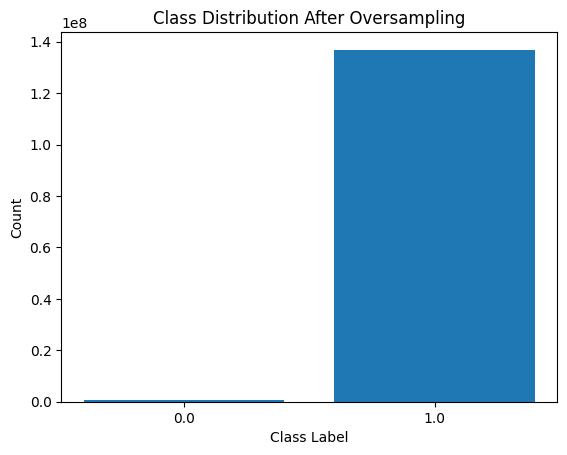

In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['dcots_data_3_14.csv']))

print('Obtaining all the entries with SwitchNum of 1: \n')
df1 = df.loc[df['SwitchNum'] == 1]
print(df1, '\n')
print('Dropping columns with all 0 entries: \n')
df2 = df1.loc[:, (df1 != 0).any(axis=0)] ## dropping all zero entries
print(df2, '\n')

##### Setting input and output #####
input = df2.loc[:,'Pd1':'Pd118']
output = df2.loc[:,'z1':'z186']
train_input = input.drop(input.index[4000:5000])
train_output = output.drop(output.index[4000:5000])

print('Input data: \n')
print(train_input)
print('Output data: \n')
print(train_output)

# Count the number of samples in each class
unique, counts = np.unique(train_output.values, return_counts=True)
class_labels = [str(i) for i in unique]

# Find the minority class label
minority_class_label = unique[np.argmin(counts)]

# Get the indices of the samples in the minority class
minority_indices = np.where(train_output == minority_class_label)[0]

# Oversample the minority class
n_samples = np.max(counts) - counts[np.argmin(counts)]
oversampled_minority_indices = np.random.choice(minority_indices, size=n_samples, replace=True)

# Add the oversampled minority class samples to the resampled data
oversampled_minority_samples = train_output.iloc[oversampled_minority_indices, :]
train_output_resampled = pd.concat([train_output, oversampled_minority_samples], axis=0)

# Shuffle the resampled data
train_output_resampled = train_output_resampled.sample(frac=1, random_state=42)

# Count the number of samples in each class after oversampling
unique, counts = np.unique(train_output_resampled.values, return_counts=True)

# Create bar plot
import matplotlib.pyplot as plt
plt.bar(class_labels, counts)
plt.title("Class Distribution After Oversampling")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


Obtaining all the entries with SwitchNum of 1: 

       Scenario  SwitchNum   Pd1   Pd2   Pd3   Pd4  Pd5   Pd6   Pd7   Pd8  \
0           0.0        1.0  48.0  23.9  41.5  37.1  0.0  48.5  15.8  24.6   
9           1.0        1.0  56.4  21.4  41.2  44.5  0.0  41.7  20.4  27.7   
17          2.0        1.0  57.2  24.0  32.6  43.7  0.0  44.0  20.9  32.1   
26          3.0        1.0  52.3  23.8  32.3  31.4  0.0  48.3  15.9  23.7   
35          4.0        1.0  52.6  20.6  33.5  43.3  0.0  61.7  17.3  29.3   
...         ...        ...   ...   ...   ...   ...  ...   ...   ...   ...   
42314    5000.0        1.0  48.5  16.3  37.9  46.6  0.0  56.3  20.0  28.8   
42323    5000.0        1.0  51.1  18.2  35.5  41.6  0.0  43.3  16.0  22.4   
42330    5000.0        1.0  43.5  17.1  40.1  46.8  0.0  48.9  16.0  31.8   
42339    5000.0        1.0  52.9  19.8  43.3  37.0  0.0  58.9  16.9  31.1   
42348    5000.0        1.0  47.0  19.1  36.3  43.4  0.0  45.7  18.8  31.6   

       ...  z179  z180  z1

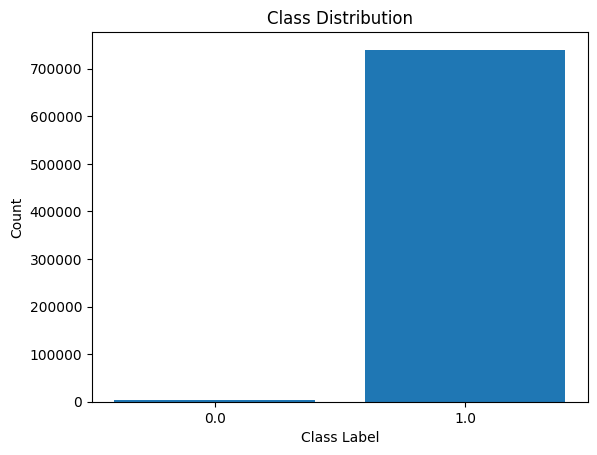

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['dcots_data_3_14.csv']))

print('Obtaining all the entries with SwitchNum of 1: \n')
df1 = df.loc[df['SwitchNum'] == 1]
print(df1, '\n')
print('Dropping columns with all 0 entries: \n')
df2 = df1.loc[:, (df1 != 0).any(axis=0)] ## dropping all zero entries
print(df2, '\n')

##### Setting input and output #####
input = df2.loc[:,'Pd1':'Pd118']
output = df2.loc[:,'z1':'z186']
train_input = input.drop(input.index[4000:5000])
train_output = output.drop(output.index[4000:5000])

print('Input data: \n')
print(train_input)
print('Output data: \n')
print(train_output)

# Count the number of samples in each class
unique, counts = np.unique(train_output.values, return_counts=True)
class_labels = [str(i) for i in unique]

# Create bar plot
plt.bar(class_labels, counts)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


PREPARING THE DATA:

input: all columns except z and cost
output: only z columns

remove columns with all 0s from ONLY the input data

Q1: Take only the first entry from every scenario where only one switching takes place

for training and validation, use 80% of the data
Therefore, 0-39,999 for training and validation

In [ ]:
##### IMPORTING MODULES FOR TRAINING THE DATASET ######

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.losses import binary_crossentropy, sparse_categorical_crossentropy
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


Before we feed a data into a network, we must normalize each feature independently so that it had a standard deviation of 1 and a mean of 0.

In general, it isn’t safe to feed into a neural network data that takes relatively large val- ues (for example, multidigit integers, which are much larger than the initial values taken by the weights of a network)

In [ ]:
##### SCALING THE DATA #####
 
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

import random

random.seed(10)

### Load Data and Generated data do not have the same shape ###
### Data organized to be in a numpy array for the input (load) samples ###

### StandardScaler
train_input = np.array(train_input)

### target (gen) data needs to be in the same format as load data ###
train_output = np.array(train_output)

## To get rid of any imposed order from the data generation process ##
train_input, train_output = shuffle(train_input, train_output)

### Data normalization is applied for higher learning efficiency ###
## feature range ranging from 0 to 1 to avoid wide range between data points ##
scaler = StandardScaler()

# rescale the data to have zero mean and unit variance

scaled_train_input = scaler.fit_transform(train_input) 
scaled_train_output = scaler.fit_transform(train_output) 

print(scaled_train_input.shape)
print(scaled_train_output.shape)

(4000, 99)
(4000, 186)


In [ ]:
##### USE SEQUENTIAL MODEL FOR TRAINING ######
### Sequential model is a linear stack of layers ###
## The number of neurons in the input layer is equal to the number of loads in the data (which for this case is 419) ##
from keras import regularizers

# L1 or L2 regularization to prevent overfitting
# model = Sequential([
#          Dense(units = 99, input_shape = (None,99), activation = 'relu', kernel_regularizer=regularizers.l1(0.01)),
#          Dense(units = 64, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)),
#          Dense(units = 32, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)),
#          Dense(units = 16, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)),
#          Dense(units = 186, activation = 'softmax', kernel_regularizer=regularizers.l1(0.01))
#      ])


model = Sequential([
           Dense(units = 99, input_shape = (None, 99), activation = 'relu'),
           Dense(units = 64, activation = 'relu'),
           Dense(units = 32, activation = 'relu'),
           Dense(units = 16, activation = 'relu'),
           Dense(units = 186, activation = 'softmax')
     ])

Epoch 1/300
240/240 [==============================] - 2s 5ms/step - loss: 0.0870 - accuracy: 0.1967 - val_loss: -0.0714 - val_accuracy: 0.3631
Epoch 2/300
240/240 [==============================] - 1s 5ms/step - loss: -53.5652 - accuracy: 0.3262 - val_loss: -326.2096 - val_accuracy: 0.3638
Epoch 3/300
240/240 [==============================] - 1s 4ms/step - loss: -4749.4941 - accuracy: 0.4571 - val_loss: -12659.0908 - val_accuracy: 0.5806
Epoch 4/300
240/240 [==============================] - 1s 4ms/step - loss: -47405.0195 - accuracy: 0.5888 - val_loss: -83856.3906 - val_accuracy: 0.3638
Epoch 5/300
240/240 [==============================] - 1s 4ms/step - loss: -206018.0156 - accuracy: 0.4517 - val_loss: -299272.0938 - val_accuracy: 0.3638
Epoch 6/300
240/240 [==============================] - 1s 4ms/step - loss: -603774.9375 - accuracy: 0.4146 - val_loss: -793963.0625 - val_accuracy: 0.6612
Epoch 7/300
240/240 [==============================] - 1s 4ms/step - loss: -1424614.6250 - ac

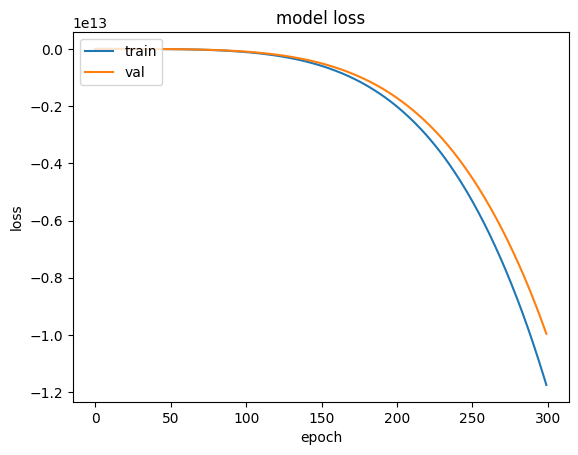

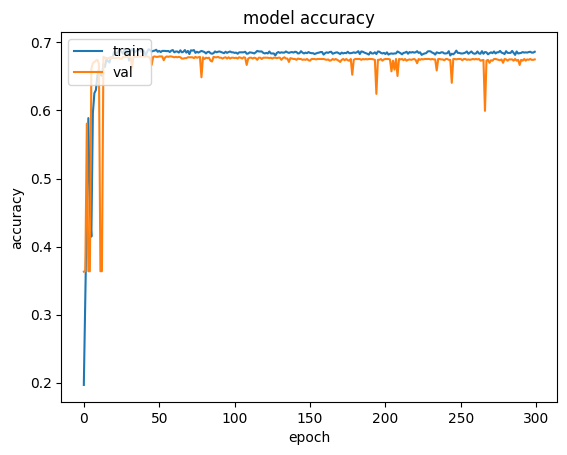

In [ ]:
##### TRAINING THE DATA #####

### Compile the model to prepare for training ###

## random seed
from tensorflow import random
random.set_seed(1)
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

### training occurs when fit function is called
#history = model.fit(x = partial_load_train, y = partial_gen_train, batch_size = 10, epochs = 300, validation_data = (load_val, gen_val)) 
history = model.fit(x = scaled_train_input, y = scaled_train_output, batch_size = 10, epochs = 300, validation_split = 0.4) 

model.summary()

import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plotting Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show() 

In [ ]:
##### PREPROCESS THE DATA #####

import random

random.seed(10)

test_input = input.drop(input.index[0:4000])
test_output = output.drop(output.index[0:4000])

print(test_input)
print(test_output)

test_input= np.array(test_input)

test_output = np.array(test_output)

test_input, train_output = shuffle(test_input, test_output)

## feature range ranging from 0 to 1 ##
scaler = StandardScaler()

# rescale the data to (0,1) to be able to pass it to the fit transform function
scaled_test_input = scaler.fit_transform(test_input) 


        Pd1   Pd2   Pd3   Pd4   Pd6   Pd7   Pd8  Pd11  Pd12  Pd13  ...  Pd108  \
33914  54.2  18.0  44.3  45.5  57.6  21.2  31.0  75.4  39.0  40.4  ...   1.68   
33923  44.3  20.5  35.6  43.8  57.8  17.4  24.6  63.7  46.4  32.3  ...   2.37   
33932  47.8  17.2  32.8  45.6  61.4  21.1  32.8  63.7  39.9  31.4  ...   2.29   
33938  55.4  17.8  39.4  34.4  49.5  16.9  23.9  71.5  43.5  32.5  ...   1.93   
33947  56.6  19.8  32.9  35.1  54.9  17.8  32.7  58.0  47.0  36.8  ...   2.24   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
42314  48.5  16.3  37.9  46.6  56.3  20.0  28.8  62.5  42.3  32.1  ...   2.32   
42323  51.1  18.2  35.5  41.6  43.3  16.0  22.4  57.1  47.3  37.6  ...   2.07   
42330  43.5  17.1  40.1  46.8  48.9  16.0  31.8  58.9  56.0  34.3  ...   1.61   
42339  52.9  19.8  43.3  37.0  58.9  16.9  31.1  74.0  55.3  33.0  ...   2.12   
42348  47.0  19.1  36.3  43.4  45.7  18.8  31.6  75.9  42.3  33.8  ...   2.40   

       Pd109  Pd110  Pd112 

In [ ]:
##### PREDICT #####
predictions = model.predict(x = scaled_test_input, batch_size = 10, verbose = 0)
print(predictions)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [ ]:
round = print(np.round(predictions))
pred = pd.DataFrame(round)

# from google.colab import files
# pred.to_csv('output.csv', encoding = 'utf-8-sig') 
# files.download('output.csv')



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.